# Robin_Test - Data Analysis Project

This notebook demonstrates common patterns for data analysis that would benefit from AI coding assistance.

## Project Structure
- Data loading and preprocessing
- Exploratory data analysis with visualizations
- Statistical analysis and modeling
- Results export and reporting

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.3


In [ ]:
%pip install pandas numpy matplotlib seaborn --break-system-packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 36.0 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 35.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [seaborn]1/12 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Generate sample dataset
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=1000, freq='D')
data = {
    'date': dates,
    'sales': np.random.normal(1000, 200, 1000) + np.sin(np.arange(1000) * 2 * np.pi / 365) * 100,
    'temperature': np.random.normal(20, 10, 1000) + np.sin(np.arange(1000) * 2 * np.pi / 365) * 15,
    'marketing_spend': np.random.exponential(500, 1000),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 1000)
}

df = pd.DataFrame(data)
df['sales'] = np.maximum(df['sales'], 0)  # Ensure non-negative sales
print(f"Dataset created with {len(df)} rows and {len(df.columns)} columns")
df.head()

Dataset created with 1000 rows and 5 columns


,date,sales,temperature,marketing_spend,region
0,2024-01-01,1099.342831,33.993554,261.370237,East
1,2024-01-02,974.068475,29.504537,34.144690,East
2,2024-01-03,1132.979869,21.112628,214.484999,West
3,2024-01-04,1309.767938,14.304927,58.827952,South
4,2024-01-05,960.049568,28.014270,825.742855,West


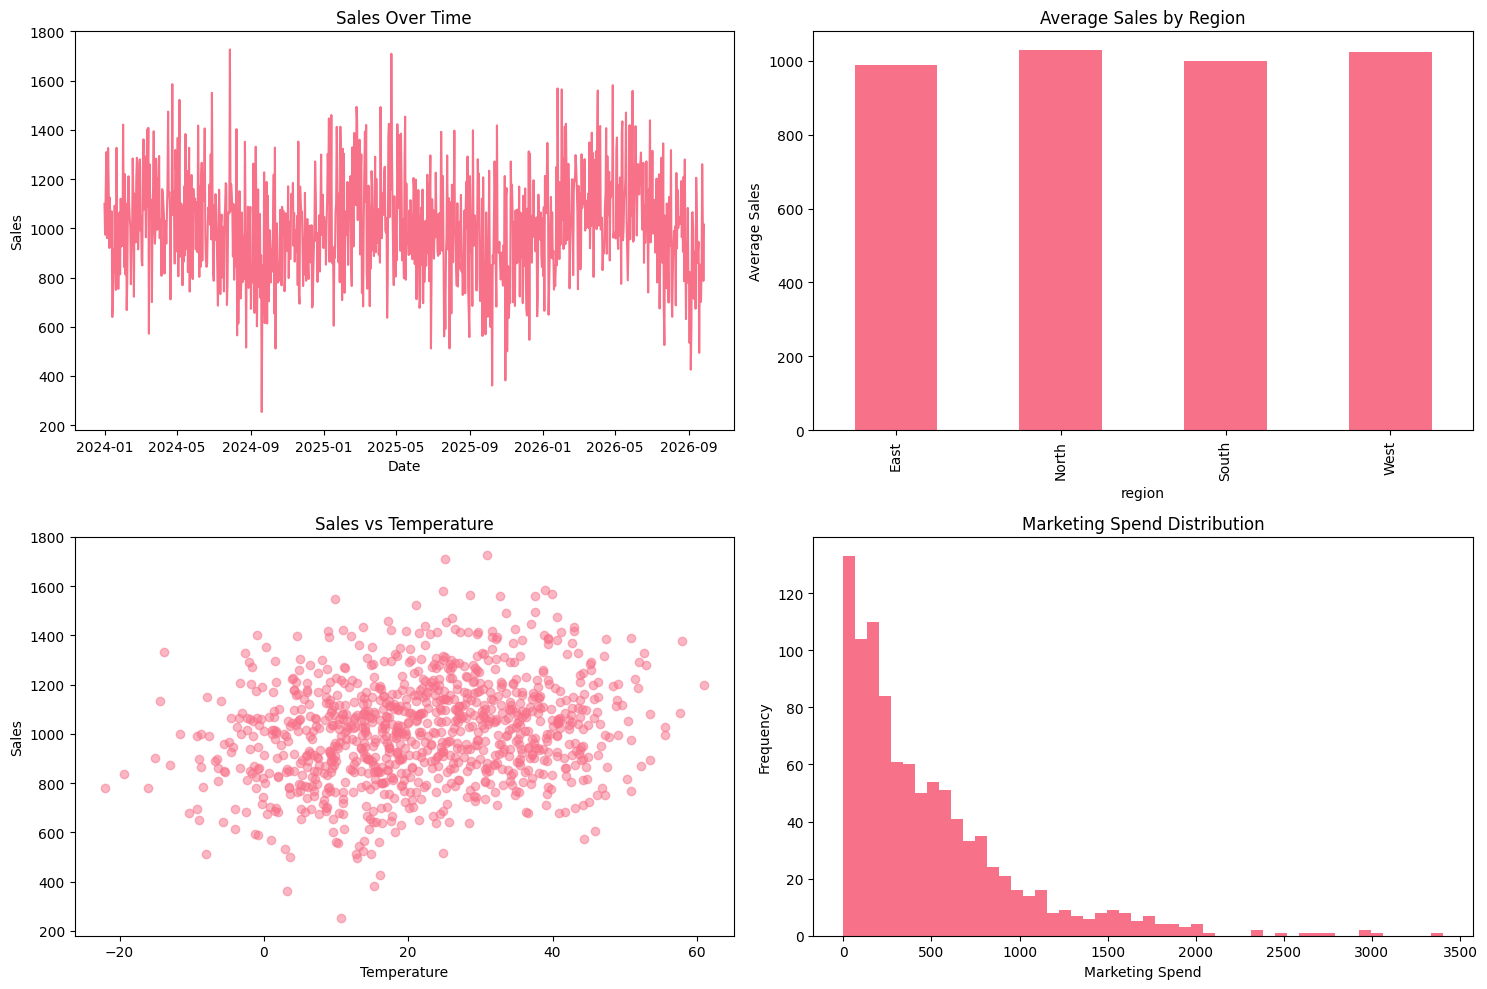


Dataset Summary:
                      date        sales  temperature  marketing_spend
count                 1000  1000.000000  1000.000000      1000.000000
mean   2025-05-14 12:00:00  1010.100049    21.643408       493.889074
min    2024-01-01 00:00:00   253.785163   -22.082622         0.005817
25%    2024-09-06 18:00:00   866.037898    10.874327       142.180405
50%    2025-05-14 12:00:00  1013.083162    21.384851       347.076212
75%    2026-01-19 06:00:00  1141.986271    32.838464       689.613514
max    2026-09-26 00:00:00  1726.494420    60.993362      3402.875610
std                    NaN   208.079010    14.573562       490.339563


In [ ]:
# Data exploration and visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sales over time
axes[0, 0].plot(df['date'], df['sales'])
axes[0, 0].set_title('Sales Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales')

# Sales by region
df.groupby('region')['sales'].mean().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Sales by Region')
axes[0, 1].set_ylabel('Average Sales')

# Sales vs temperature correlation
axes[1, 0].scatter(df['temperature'], df['sales'], alpha=0.5)
axes[1, 0].set_title('Sales vs Temperature')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Sales')

# Marketing spend distribution
axes[1, 1].hist(df['marketing_spend'], bins=50)
axes[1, 1].set_title('Marketing Spend Distribution')
axes[1, 1].set_xlabel('Marketing Spend')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nDataset Summary:")
print(df.describe())